In [1]:
from ema_workbench import (MultiprocessingEvaluator,SequentialEvaluator, ema_logging, save_results, load_results)
from ema_workbench.analysis import pairs_plotting
from ema_workbench.em_framework.evaluators import SOBOL
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ema_problem_definitions import ema_problem

In [2]:
# enable logging
ema_logging.LOG_FORMAT = '%(message)s'
ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

In [3]:
# import problem definition
model = ema_problem(3)

In [4]:
with MultiprocessingEvaluator(model, 8) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(scenarios=4, policies=5)

pool started
performing 4 scenarios * 5 policies * 1 model(s) = 20 experiments
2 cases completed
4 cases completed
6 cases completed
8 cases completed
10 cases completed
12 cases completed
14 cases completed
16 cases completed
18 cases completed
20 cases completed
experiments finished
terminating pool


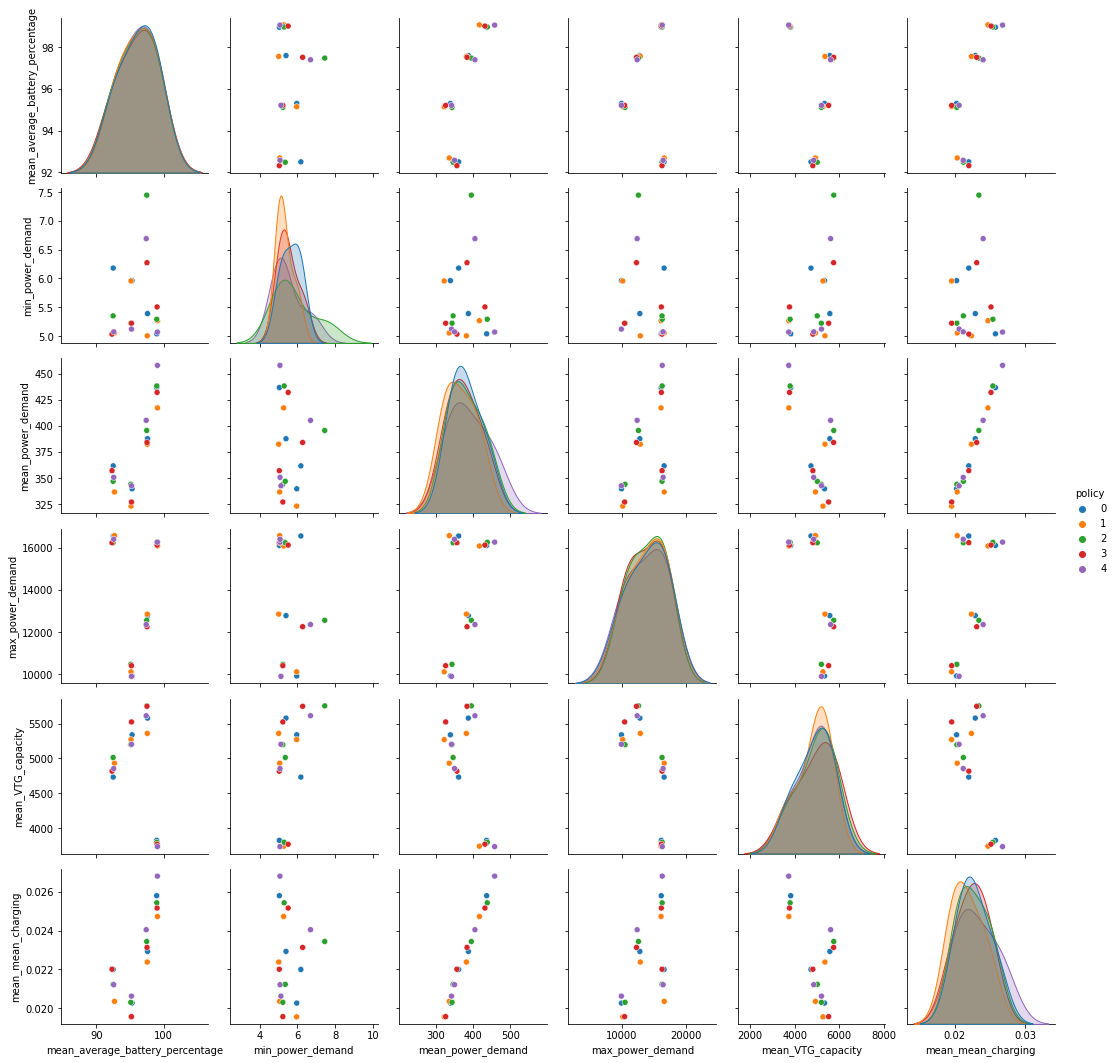

In [6]:
policies = experiments['policy']
for i, policy in enumerate(np.unique(policies)):
    experiments.loc[policies==policy, 'policy'] = str(i)
data = pd.DataFrame(outcomes)
data['policy'] = policies
sns.pairplot(data, hue='policy', vars=list(outcomes.keys()))
plt.show()